# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [ ]:
## 계획: 1.데이터 로드 및 살펴보기(11/오전) -> 2.가설 설정(11/오전) -> 3.데이터 전처리(11/오후) -> 4.데이터 시각화(11/오후) -> 5.해석 및 결론 도출(11/오후)

In [37]:
import pandas as pd

In [39]:
access_data = pd.read_table('C:/workspace/wassup_4/05_Data_Analysis/data/mini.csv', sep=',')

## 데이터 살펴보기

In [15]:
access_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [17]:
access_data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [19]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [21]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


### 데이터를 통한 온라인 학습 플랫폼 유형 파악

- 학습 플랫폼의 목적, 제공하는 교육 콘텐츠, 사용자들이 기대하는 목표 등에 따라 사용자의 행동 패턴이 달라지기 때문에, 우선적으로 온라인 학습 플랫폼 유형를 파악해 가설을 만들 필요성을 느낌.
- 학습 플랫폼 유형 4가지
    
    1.자격증이나 인증을 목표로 하는 플랫폼
    
    2.취미나 자기계발을 위한 학습 플랫폼
    
    3.직무 교육이나 기업 교육을 위한 플랫폼
    
    4.코딩, 데이터 과학 등의 전문 기술 학습 플랫폼 4가지로 분류.
    
- 데이터의 주요 변수를 통해 플랫폼 유형 파악
이 데이터가 어떤 유형의 온라인 학습 플랫폼에 해당하는지 판단하기 위해, 제공된 변수들의 특징을 분석해 보면 몇 가지 단서를 얻을 수 있을 것이라 생각 되어짐.
    - 학습 세션 당 평균 시간:
    이 변수는 사용자가 각 학습 세션에서 학습에 소요한 시간을 나타냄. 이 변수는 학습 시간이 중요시되는 자격증 과정이나 기술 학습 플랫폼에서 많이 사용됨. 사용자가 매번 얼마나 집중해서 학습하는지를 알아 보기 용의하기 때문이다.
    - 월간 학습 일수:
    사용자가 한 달 동안 몇 일간 학습에 참여했는지 나타냄. 학습 패턴을 통해 사용자의 꾸준함을 평가할 수 있다. 전문 기술 학습 플랫폼이나 직무 관련 플랫폼에서 자주 사용하는 지표일 가능성이 큼.
    - 최근 학습 성취도:
    사용자의 성취도를 평가하는 지표는 평가나 퀴즈가 포함된 학습 과정에서 주로 사용. 이는 학습의 결과물이 중요한 기술 학습 플랫폼이나 자격증 플랫폼일 가능성을 나타냄.
    - 중단된 학습 세션 수:
    학습을 중단한 횟수를 측정하는 것은 사용자가 특정 학습 과정에서 얼마나 어려움을 겪는지 또는 흥미를 잃었는지 나타냅니다. 이 변수는 코딩이나 데이터 과학과 같은 고난이도 학습 과정에서 유용할 수 있습니다. 특히 학습 중 중단율이 높은 기술 기반 플랫폼에서 많이 나타날 수 있습니다.
    - 최근 학습 성취도:
    사용자가 선호하는 학습 난이도를 측정하는 것은 학습 콘텐츠가 다양한 난이도를 제공하는 플랫폼이라는 것을 시사함. 예를 들어, 코딩 학습 또는 데이터 과학과 같은 플랫폼에서는 초급부터 고급까지 다양한 난이도를 제공함.
    - 선호하는 난이도:
    사용자가 선호하는 학습 난이도를 측정하는 것은 학습 콘텐츠가 다양한 난이도를 제공하는 플랫폼이라는 것을 시사함. 예를 들어, 코딩 학습 또는 데이터 과학과 같은 플랫폼에서는 초급부터 고급까지 다양한 난이도를 제공함.
    - 커뮤니티 참여도:
    커뮤니티 활동을 평가하는 것은 사용자가 학습 외에 다른 사용자와 상호작용하는 커뮤니티 중심의 학습 플랫폼이라는 점을 보여줌. 이는 사용자가 서로 질문을 하거나 의견을 나누는 기술 학습 플랫폼이나 직무 능력 향상 플랫폼에서 자주 나타남.
    - 결제 패턴:
    결제 패턴을 추적하는 변수는 사용자의 구독 여부를 평가하는데 매우 중요한 지표입니다. 특히 구독 기반 학습 플랫폼에서 주로 사용함.
- 결론: 이와 같은 단서들을 고려해 봤을시, 이 데이터는 '전문 기술 학습 플랫폼' 또는 '직무 관련 학습 플랫폼'에 가까울 가능성이 크다는 것을 알 수 있다. 주로 코딩, 데이터, it 기술 등을 중점적으로 배우는 학습 플랫폼이라 추정 할 수 있다.

### 전문 기술 학습 플랫폼이 가설에 미치는 영향

- 전문 기술 학습 플랫폼:
전문 기술을 배우기 위한 사용자가 많다. 이 경우 학습 난이도와 성취도가 구독 연장 여부에 큰 영향을 미칠 수 있다. 따라서 코딩이나 데이터 과학과 같은 어려운 기술 학습에서는 학습 난이도가 적절한 사용자가 구독을 더 오래 유지할 가능성이 크다는 가설을 세워볼 수 있다. 또한 사용자가 목표로한 수준에 달성 했을 시 구독을 취소할 가능성이 크다는가럿을 세워볼 수 있다.
- 직무 관련 학습 플랫폼:
사용자의 직무 능력을 향상시키기 위한 목적으로 많이 사용되며, 이 경우 구독 여부는 직무 관련 학습 필요성과 회사 지원 여부에 크게 좌우될 수 있다. 또한 정보 공유와 함께 문제해결을 하는 방식의 학습을 할 수 있다. 따라서 사용자는 회사 지원 여부에 따라 구독 연장 여부와 커뮤니티 참여도가 구독 연장에 영향을 준다는 가설을 세워볼 수 있다.

### 가설

1. 성취도가 높은 사용자는 목표를 달성하고 구독을 중단할 가능성이 크다. 기술 학습에서 성취를 이룬 사용자는 더 이상 추가 학습이 필요 없다고 느껴 구독을 중단할 것이다.
2. 난이도가 기술 학습에서 사용자들이 일반적으로 목표를 달성하기 위해 적정 난이도의 강의를 선택하는 경향이 있기 때문에, 적절한 도전과 성취감을 느낄 가능성이 큰 중간 난이도의 사랃들이 구독을 유지할 가능성이 크다.
3. 커뮤니티 참여도가 높을수록 구독을 연장할 확률이 높다. 커뮤니티에서 활발히 활동하는 사용자는 학습에서 얻는 성취감을 넘어, 커뮤니티 자체에서 얻는 만족감으로 인해 구독을 연장할 가능성이 크다.

In [ ]:
# 가설 1.성취도가 높은 사용자는 목표를 달성하고 구독을 중단할 가능성이 크다.

In [41]:
df = pd.read_csv('C:/workspace/wassup_4/05_Data_Analysis/data/mini.csv')

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib 

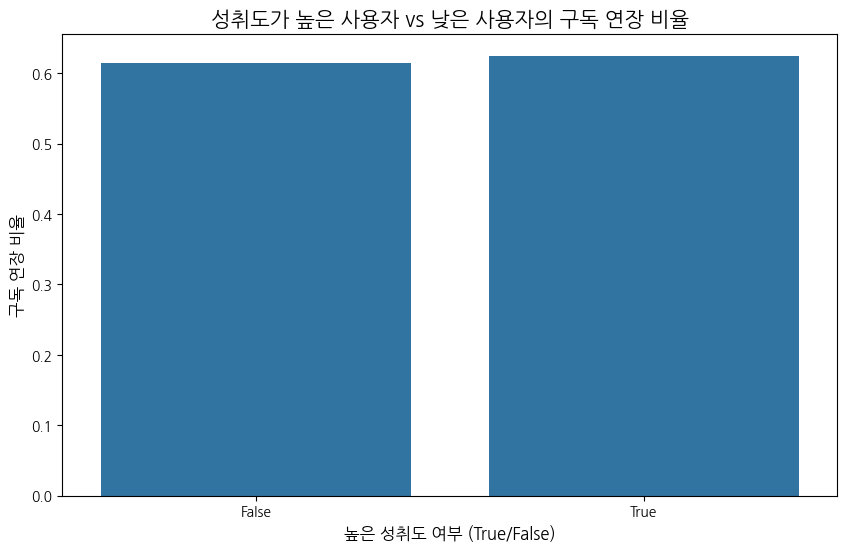

In [71]:
# 성취도를 기준으로 구독 여부 분석
high_achievement = df['recent_learning_achievement'] > df['recent_learning_achievement'].mean()
high_achievement_target = df.groupby(high_achievement)['target'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=high_achievement_target.index, y=high_achievement_target.values)
plt.title('성취도가 높은 사용자 vs 낮은 사용자의 구독 연장 비율', fontsize=15)  
plt.xlabel('높은 성취도 여부 (True/False)', fontsize=12)  
plt.ylabel('구독 연장 비율', fontsize=12) 
plt.show()

In [ ]:
# 이상치 제거 후 다시 분석

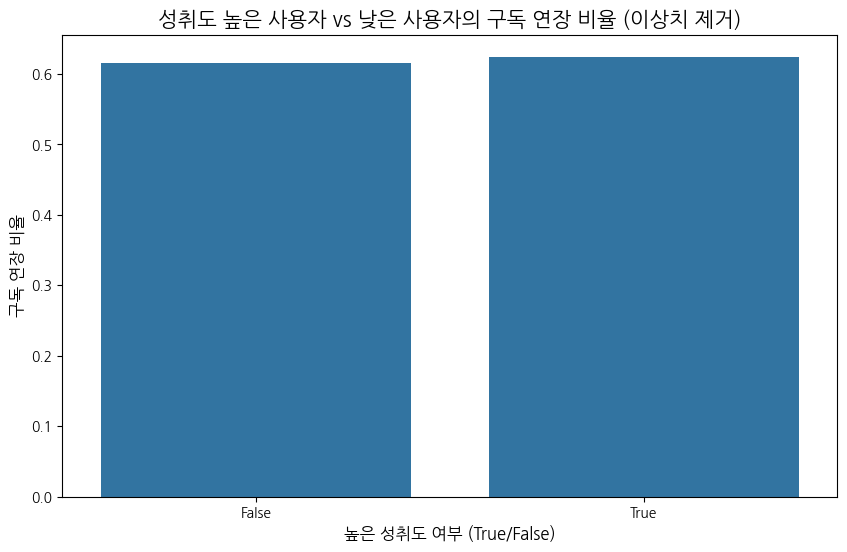

In [77]:

# IQR 계산 (사분위 범위)
Q1 = df['recent_learning_achievement'].quantile(0.25)
Q3 = df['recent_learning_achievement'].quantile(0.75)
IQR = Q3 - Q1

# 상한과 하한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치에 해당하는 행 탐지
outliers = df[(df['recent_learning_achievement'] < lower_bound) | (df['recent_learning_achievement'] > upper_bound)]

# 이상치 제거 (drop 사용)
df_cleaned = df.drop(outliers.index)

# 성취도를 기준으로 구독 여부 분석
high_achievement_cleaned = df_cleaned['recent_learning_achievement'] > df_cleaned['recent_learning_achievement'].mean()
high_achievement_target_cleaned = df_cleaned.groupby(high_achievement_cleaned)['target'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=high_achievement_target_cleaned.index, y=high_achievement_target_cleaned.values)
plt.title('성취도 높은 사용자 vs 낮은 사용자의 구독 연장 비율 (이상치 제거)', fontsize=15)
plt.xlabel('높은 성취도 여부 (True/False)', fontsize=12)
plt.ylabel('구독 연장 비율', fontsize=12)
plt.show()


In [ ]:
# 가설 1-2. 난이도 별 성취도 높은 사용자 vs 낮은 사용자의 구독 연장 비율

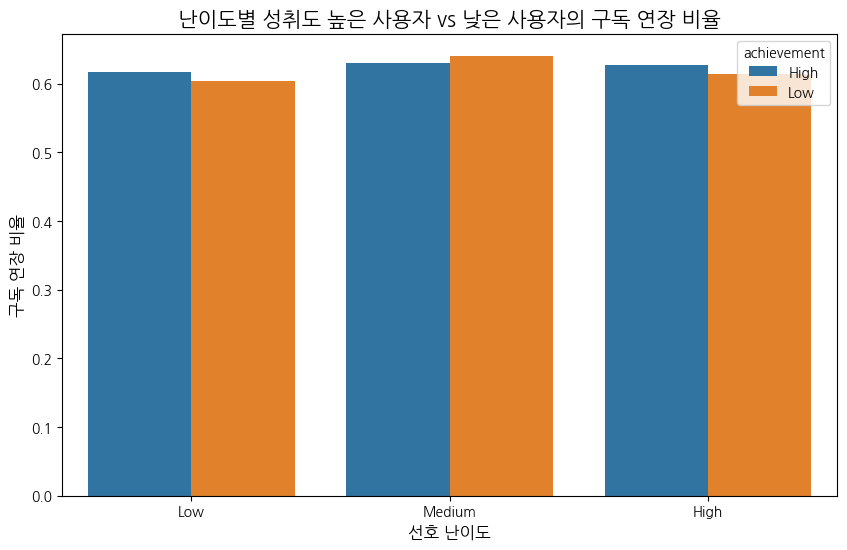

In [73]:

# 난이도별로 데이터 그룹화
difficulty_levels = df['preferred_difficulty_level'].unique()

# 난이도별로 성취도 높은 사용자와 낮은 사용자를 구분하고 구독 연장 비율 계산
results = []

for difficulty in difficulty_levels:
    # 난이도에 따른 필터링
    difficulty_group = df[df['preferred_difficulty_level'] == difficulty]
    
    # 해당 난이도 그룹에서 성취도 높은 사용자와 낮은 사용자 구분 (평균 기준)
    high_achievement = difficulty_group['recent_learning_achievement'] > difficulty_group['recent_learning_achievement'].mean()
    
    # 성취도 높은 사용자 그룹에서 구독 연장 비율 계산
    high_achievement_target = difficulty_group[high_achievement]['target'].mean()
    
    # 성취도 낮은 사용자 그룹에서 구독 연장 비율 계산
    low_achievement_target = difficulty_group[~high_achievement]['target'].mean()
    
    # 결과 저장 (난이도, 성취도 구분, 구독 연장 비율)
    results.append({'difficulty': difficulty, 'achievement': 'High', 'subscription_rate': high_achievement_target})
    results.append({'difficulty': difficulty, 'achievement': 'Low', 'subscription_rate': low_achievement_target})


results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
sns.barplot(x='difficulty', y='subscription_rate', hue='achievement', data=results_df)
plt.title('난이도별 성취도 높은 사용자 vs 낮은 사용자의 구독 연장 비율', fontsize=15)
plt.xlabel('선호 난이도', fontsize=12)
plt.ylabel('구독 연장 비율', fontsize=12)
plt.show()


<결론>
성취도가 높은 사용자와 성취도가 낮은 사용자의 구독 연장 비율이 거의 비슷한 수준입니다. 즉, 성취도가 높다고 해서 구독을 더 오래 유지하거나 빨리 종료하는 경향이 뚜렷하게 나타나지 않음.
즉, 성취도가 높은 사용자는 목표를 달성하고 구독을 중단할 가능성이 크다는 가설을 틀렸다.

In [ ]:
# 가설 2.중간 난이도의 사랃들이 구독을 유지할 가능성이 크다

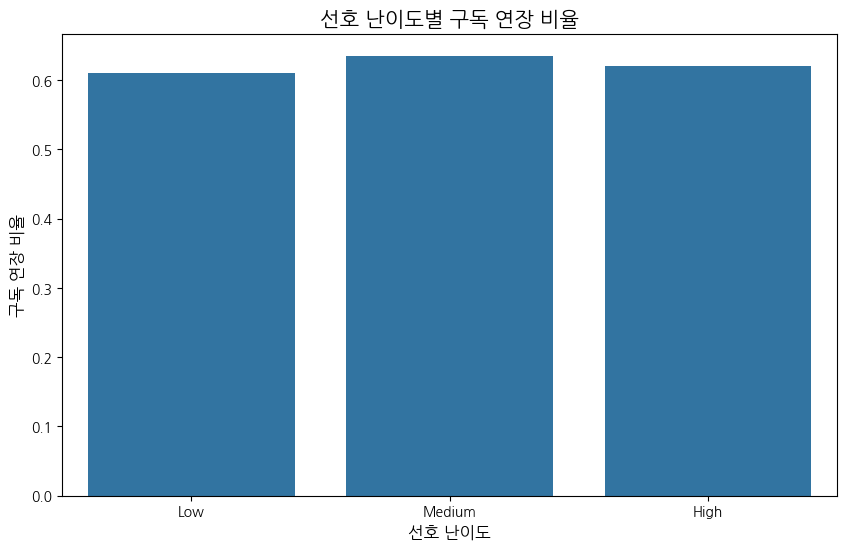

In [79]:
# 난이도에 따른 구독 연장 여부 분석
difficulty_target = df.groupby('preferred_difficulty_level')['target'].mean()

# 정렬 
difficulty_order = ['Low', 'Medium', 'High']
difficulty_target = difficulty_target.reindex(difficulty_order)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=difficulty_target.index, y=difficulty_target.values)
plt.title('선호 난이도별 구독 연장 비율', fontsize=15)  
plt.xlabel('선호 난이도', fontsize=12)  
plt.ylabel('구독 연장 비율', fontsize=12)  
plt.show()

<결론>
그래프를 해석해보면, 선호하는 난이도에 따른 구독 연장 비율이 거의 동일한 것으로 보인다. 각 난이도(Low, Medium, High)에 대한 구독 연장 비율이 큰 차이를 보이지 않는다는 점에서 선호 난이도가 구독 연장 여부에 큰 영향을 미치지 않는다는 결론을 도출할 수 있었다
즉,중간 난이도의 사랃들이 구독을 유지할 가능성이 크다는 가설은 틀렸다.

In [ ]:
# 가설 3. 커뮤니티 참여도가 높을수록 구독을 연장할 확률이 높다.

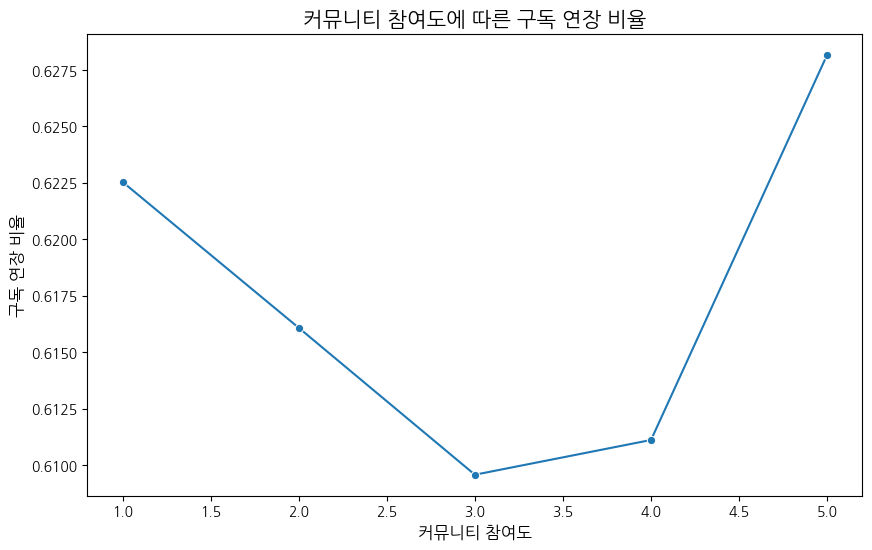

In [59]:
# 커뮤니티 참여도에 따른 구독 연장 여부 분석
community_target = df.groupby('community_engagement_level')['target'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=community_target.index, y=community_target.values, marker='o')
plt.title('커뮤니티 참여도에 따른 구독 연장 비율', fontsize=15)
plt.xlabel('커뮤니티 참여도', fontsize=12)
plt.ylabel('구독 연장 비율', fontsize=12)  
plt.show()

<결론>
커뮤니티 참여도가 매우 낮거나 매우 높은 사용자는 구독을 연장할 가능성이 상대적으로 높다. 
반면, 중간 정도의 참여도(특히 3 수준)를 보이는 사용자는 구독 연장 비율이 가장 낮은 것으로 나타났다. 
즉, 이 결과는 활발한 커뮤니티 참여가 구독 연장에 긍정적인 영향을 미친다는 가설을 어느 정도 뒷받침해 준다. 그러나 중간 수준의 참여도는 오히려 구독 중단의 요인이 될 수 있음을 나타내기도 한다.